In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sqlite3


%matplotlib inline

In [2]:
conn = sqlite3.connect('NHSdatasets.db')

In [3]:
query = "SELECT date, SUM(nhs_b) as total_nhs_days, SUM(socialcare_b) as total_socialcare_days, SUM(both_b) as total_both_days FROM dtoc GROUP BY date"

total_days = pd.read_sql(query, con=conn, parse_dates=['date'])

In [4]:
total_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
date                     53 non-null datetime64[ns]
total_nhs_days           53 non-null float64
total_socialcare_days    53 non-null float64
total_both_days          53 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 KB


In [5]:
total_days.head()

,date,total_nhs_days,total_socialcare_days,total_both_days
0,2012-01-01,71804.0,31219.0,8911.0
1,2012-02-01,69411.0,31515.0,8606.0
2,2012-03-01,76448.0,34749.0,8539.0
3,2012-04-01,68751.0,31755.0,7976.0
4,2012-05-01,76354.0,34012.0,8965.0


In [6]:
total_days = total_days.set_index('date')

In [7]:
total_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2012-01-01 to 2016-10-01
Data columns (total 3 columns):
total_nhs_days           53 non-null float64
total_socialcare_days    53 non-null float64
total_both_days          53 non-null float64
dtypes: float64(3)
memory usage: 1.7 KB


In [8]:
total_days.head()

,total_nhs_days,total_socialcare_days,total_both_days
date,,,
2012-01-01,71804.0,31219.0,8911.0
2012-02-01,69411.0,31515.0,8606.0
2012-03-01,76448.0,34749.0,8539.0
2012-04-01,68751.0,31755.0,7976.0
2012-05-01,76354.0,34012.0,8965.0


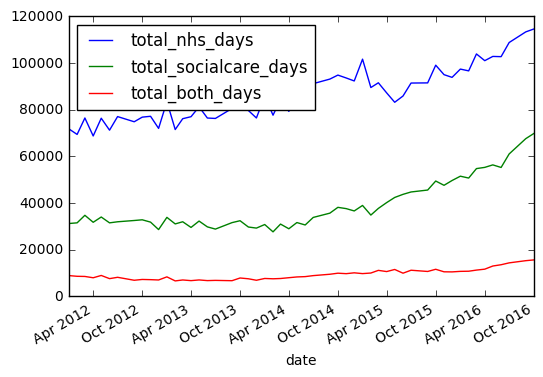

In [9]:
total_days.plot.line()

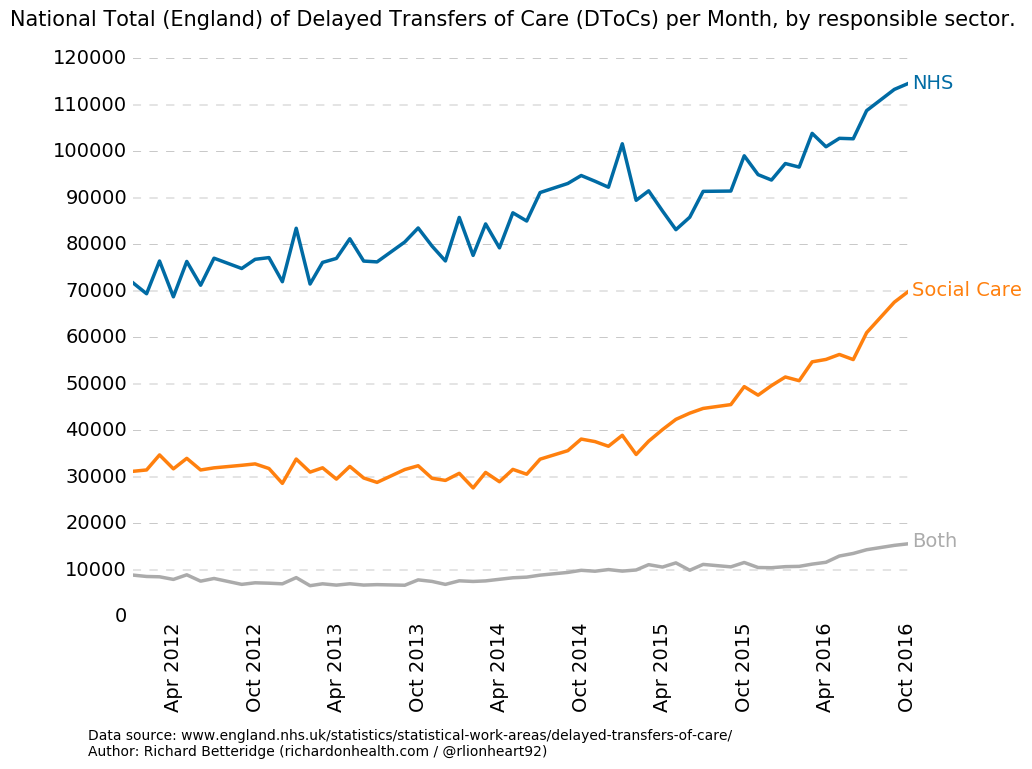

In [10]:
tableau10 = [(0,107,164),(255,128,14),(171,171,171)]

for i in range(len(tableau10)):
    r, g, b = tableau10[i]
    tableau10[i] = (r / 255., g / 255., b / 255.)
    
plt.figure(figsize=(10, 7.5))

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.ylim(0,125000)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(range(0,120001,10000),
           [str(x) for x in range(0,121000,10000)],
           fontsize=14)

for y in range(10000,130000,10000):
    plt.plot(range(mdates.date2num(total_days.index.to_pydatetime())[0].astype(int),mdates.date2num(total_days.index.to_pydatetime())[-1].astype(int)),
             [y] * len(range(mdates.date2num(total_days.index.to_pydatetime())[0].astype(int),mdates.date2num(total_days.index.to_pydatetime())[-1].astype(int))), '--', lw=0.5, color='black', alpha=0.3)
    
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='on', left='off', right='off', labelleft='on')

categories = ['NHS', 'Social Care', 'Both']

for rank, column in enumerate(categories):
    if column == 'NHS':
        plt.plot(total_days['total_nhs_days'], lw=2.5, color=tableau10[rank])
        plt.text((mdates.date2num(total_days.index.to_pydatetime())[-1]+10).astype(int), 113500 , column, fontsize=14, color=tableau10[rank])
    elif column == 'Social Care':
        plt.plot(total_days['total_socialcare_days'], lw=2.5, color=tableau10[rank])
        plt.text((mdates.date2num(total_days.index.to_pydatetime())[-1]+10).astype(int), 69000 , column, fontsize=14, color=tableau10[rank])
    elif column == 'Both':
        plt.plot(total_days['total_both_days'], lw=2.5, color=tableau10[rank])
        plt.text((mdates.date2num(total_days.index.to_pydatetime())[-1]+10).astype(int), 15000 , column, fontsize=14, color=tableau10[rank])

plt.text(mdates.date2num(total_days.index.to_pydatetime())[int(len(total_days.index)/2)].astype(int), 127000, 'National Total (England) of Delayed Transfers of Care (DToCs) per Month, by responsible sector.', fontsize=15, ha='center')

plt.text((mdates.date2num(total_days.index.to_pydatetime())[0]-100).astype(int), -30000, 'Data source: www.england.nhs.uk/statistics/statistical-work-areas/delayed-transfers-of-care/'
        '\nAuthor: Richard Betteridge (richardonhealth.com / @rlionheart92)')

plt.show()

In [11]:
conn.close()